In [ ]:
!pip install tensorflow==2.8.0

In [ ]:
!pip install livelossplot #dodajemy biblioteke do pythona
from livelossplot import PlotLossesKeras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten,AveragePooling2D
from keras.layers import BatchNormalization
from keras.metrics import accuracy
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential  # typ Modelu
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, GRU, BatchNormalization, TimeDistributed

#from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
!wget https://bigbang.prz.edu.pl/zsiwadm/usg_linia_podstawowa.csv

--2024-07-03 15:12:29--  https://bigbang.prz.edu.pl/zsiwadm/usg_linia_podstawowa.csv
Resolving bigbang.prz.edu.pl (bigbang.prz.edu.pl)... 89.188.209.177
Connecting to bigbang.prz.edu.pl (bigbang.prz.edu.pl)|89.188.209.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93386 (91K) [text/csv]
Saving to: ‘usg_linia_podstawowa.csv.1’

usg_linia_podstawow 100%[===================>]  91.20K   234KB/s    in 0.4s    

2024-07-03 15:12:30 (234 KB/s) - ‘usg_linia_podstawowa.csv.1’ saved [93386/93386]



In [ ]:
!wget https://bigbang.prz.edu.pl/zsiwadm/usg_70x60.zip

--2024-07-03 15:12:30--  https://bigbang.prz.edu.pl/zsiwadm/usg_70x60.zip
Resolving bigbang.prz.edu.pl (bigbang.prz.edu.pl)... 89.188.209.177
Connecting to bigbang.prz.edu.pl (bigbang.prz.edu.pl)|89.188.209.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33829785 (32M) [application/zip]
Saving to: ‘usg_70x60.zip.1’

usg_70x60.zip.1     100%[===================>]  32.26M  13.0MB/s    in 2.5s    

2024-07-03 15:12:33 (13.0 MB/s) - ‘usg_70x60.zip.1’ saved [33829785/33829785]



1. import pliku csv
2. Import obrazków PNG
Wyrysowanie ramek
3. Stworzenie etykiet (csv i png)
4. Stworzenie zbioru treningowego
5. nauka sieci neuronowej
6. ocena wyniku nauki

In [ ]:
!cat usg_linia_podstawowa.csv

"nazwa_pliku","img_height","img_width","roi_1_linia_podstawowa_wsp_x","roi_1_linia_podstawowa_wsp_y","roi_1_linia_podstawowa_sze","roi_1_linia_podstawowa_wys"
"MK_01a","1215","1032","17","530","202","180"
"MK_01b","1232","1032","150","668","259","259"
"MK_02a","1217","1020","17","382","187","195"
"MK_02b","1218","1023","76","502","251","168"
"MK_03a","1211","1024","603","351","208","138"
"MK_03b","1213","1028","480","361","187","129"
"MK_04a","1214","1022","172","444","192","136"
"MK_04b","1216","1028","56","401","224","148"
"MK_05a","1261","1022","248","179","78","53"
"MK_05b","1215","1025","663","445","189","163"
"MK_06b","1217","1026","148","458","287","304"
"MK_07a","1266","1020","590","365","197","149"
"MK_07b","1282","1028","602","349","215","169"
"MK_09a","1211","1023","669","438","201","153"
"MK_09b","1213","1024","658","427","187","158"
"MK_10a","1217","1023","24","465","212","148"
"MK_10b","1223","1020","2","492","210","179"
"MK_11a","1215","1030","92","433","209","160"
"MK_1

In [ ]:
!unzip *60.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
 extracting: s6_057_A_r.png          
 extracting: s6_057_B_L.png          
 extracting: s6_057_B_R.png          
 extracting: s6_057_C_L.png          
 extracting: s6_057_C_R.png          
 extracting: s6_057_D_L.png          
 extracting: s6_057_D_R.png          
 extracting: s6_057_E_L.png          
 extracting: s6_057_E_R.png          
 extracting: s6_057_F_L.png          
 extracting: s6_057_F_R.png          
 extracting: s6_058_A_L.png          
 extracting: s6_058_A_R.png          
 extracting: s6_058_B_L.png          
 extracting: s6_058_B_R.png          
 extracting: s6_058_C_L.png          
 extracting: s6_058_C_R.png          
 extracting: s6_058_D_L.png          
 extracting: s6_058_D_R.png          
 extracting: s6_058_E_L.png          
 extracting: s6_058_E_R.png          
 extracting: s6_058_F_L.png          
 extracting: s6_058_F_R.png          
 extracting: s6_059_A_L.png          
 extracting: s6_059_A_R

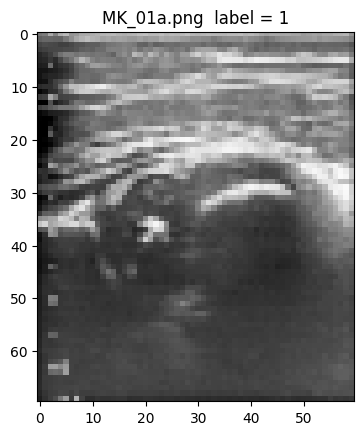

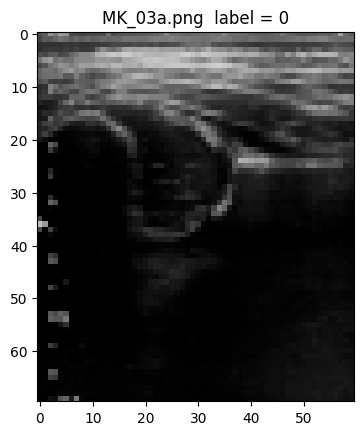

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#from PIL import Image

zdjecia = ['MK_01a.png','MK_03a.png']
etykiety = ['1','0']

i=0
for img in zdjecia:
  im = plt.imread(img)
  plt.title(str(img) + '  label = ' + etykiety[i])
  plt.imshow(im)
  plt.show()
  i=i+1

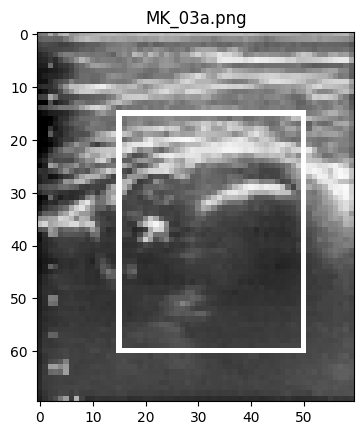

In [ ]:
from PIL import Image, ImageDraw
# Ścieżka do obrazka PNG
image_path = "MK_01a.png"

# Wczytanie obrazka
image = Image.open(image_path)

# Utworzenie obiektu ImageDraw
draw = ImageDraw.Draw(image)

# Wymiary obrazka
width, height = image.size

# Wymiary ramki
frame_width = 1

# Narysowanie ramki
draw.rectangle([(15, 15), (width - 10, height - 10)], outline="white", width=frame_width)

# Zapisanie zmodyfikowanego obrazka
image.save("obrazek_z_ramka.png")

# Wyświetlenie obrazka
image.show()

im = plt.imread("obrazek_z_ramka.png")
plt.title(str(img))
plt.imshow(im)


"nazwa_pliku","img_height","img_width","roi_1_linia_podstawowa_wsp_x","roi_1_linia_podstawowa_wsp_y","roi_1_linia_podstawowa_sze","roi_1_linia_podstawowa_wys"
"MK_01a","1215","1032","17","530","202","180"

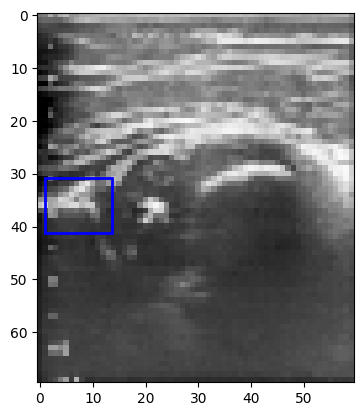

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def skaluj_wspolrzedne(x_oryg, y_oryg, szerokosc_oryg, wysokosc_oryg, szerokosc_nowe, wysokosc_nowe):
    x_nowe = (x_oryg / szerokosc_oryg) * szerokosc_nowe
    y_nowe = (y_oryg / wysokosc_oryg) * wysokosc_nowe
    return x_nowe, y_nowe

x_oryg = 17
y_oryg = 530
szerokosc_oryg = 1215
wysokosc_oryg = 1032
szerokosc_nowe = 70
wysokosc_nowe = 60

ramka_x_oryg = 17
ramka_y_oryg = 530
ramka_szerokosc_oryg = 220
ramka_wysokosc_oryg = 180
x_nowe, y_nowe = skaluj_wspolrzedne(x_oryg, y_oryg, szerokosc_oryg, wysokosc_oryg, szerokosc_nowe, wysokosc_nowe)
szerokosc_ramki_nowe = (ramka_szerokosc_oryg / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe = (ramka_wysokosc_oryg / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe = (ramka_x_oryg / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe = (ramka_y_oryg / wysokosc_oryg) * wysokosc_nowe

plt.figure()
img = plt.imread('MK_01a.png')
plt.imshow(img)

# Dodanie przeskalowanej ramki
rect = patches.Rectangle((ramka_x_nowe, ramka_y_nowe), szerokosc_ramki_nowe, wysokosc_ramki_nowe, linewidth=2, edgecolor='blue', facecolor='none')
plt.gca().add_patch(rect)

# Dodanie przeskalowanego punktu
plt.show()

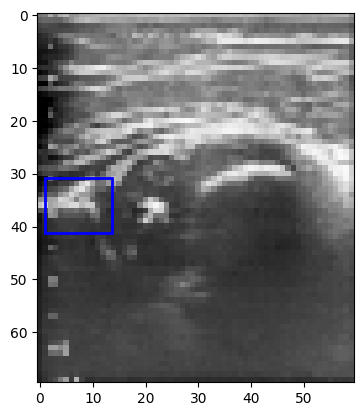

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def skaluj_wspolrzedne(x_oryg, y_oryg, szerokosc_oryg, wysokosc_oryg, szerokosc_nowe, wysokosc_nowe):
    x_nowe = (x_oryg / szerokosc_oryg) * szerokosc_nowe
    y_nowe = (y_oryg / wysokosc_oryg) * wysokosc_nowe
    return x_nowe, y_nowe

x_oryg = 17
y_oryg = 530
szerokosc_oryg = 1215
wysokosc_oryg = 1032
szerokosc_nowe = 70
wysokosc_nowe = 60

ramka_x_oryg = 17
ramka_y_oryg = 530
ramka_szerokosc_oryg = 220
ramka_wysokosc_oryg = 180
x_nowe, y_nowe = skaluj_wspolrzedne(x_oryg, y_oryg, szerokosc_oryg, wysokosc_oryg, szerokosc_nowe, wysokosc_nowe)
szerokosc_ramki_nowe = (ramka_szerokosc_oryg / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe = (ramka_wysokosc_oryg / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe = (ramka_x_oryg / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe = (ramka_y_oryg / wysokosc_oryg) * wysokosc_nowe

plt.figure()
img = plt.imread('MK_01a.png')
plt.imshow(img)

# Dodanie przeskalowanej ramki
rect = patches.Rectangle((ramka_x_nowe, ramka_y_nowe), szerokosc_ramki_nowe, wysokosc_ramki_nowe, linewidth=2, edgecolor='blue', facecolor='none')
plt.gca().add_patch(rect)

# Dodanie przeskalowanego punktu
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('usg_linia_podstawowa.csv', sep=',', header=0)
print(df.values)

[['MK_01a' 1215 1032 ... 530 202 180]
 ['MK_01b' 1232 1032 ... 668 259 259]
 ['MK_02a' 1217 1020 ... 382 187 195]
 ...
 ['s8_150_P' 1430 1062 ... 438 243 126]
 ['s8_151_L' 1322 990 ... 338 167 95]
 ['s8_151_P' 1322 990 ... 341 169 119]]


In [ ]:
print(df.iloc[0])

nazwa_pliku                     MK_01a
img_height                        1215
img_width                         1032
roi_1_linia_podstawowa_wsp_x        17
roi_1_linia_podstawowa_wsp_y       530
roi_1_linia_podstawowa_sze         202
roi_1_linia_podstawowa_wys         180
Name: 0, dtype: object


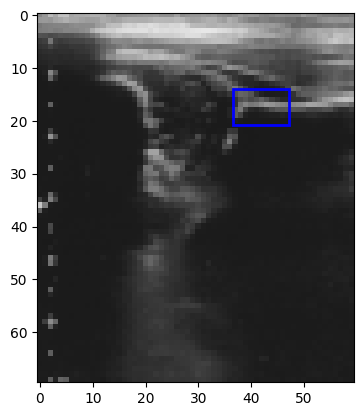

nazwa_pliku                     s2_004_A_L
img_height                            1198
img_width                             1023
roi_1_linia_podstawowa_wsp_x           623
roi_1_linia_podstawowa_wsp_y           240
roi_1_linia_podstawowa_sze             182
roi_1_linia_podstawowa_wys             115
Name: 178, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def skaluj_wspolrzedne(x_oryg, y_oryg, szerokosc_oryg, wysokosc_oryg, szerokosc_nowe, wysokosc_nowe):
    x_nowe = (x_oryg / szerokosc_oryg) * szerokosc_nowe
    y_nowe = (y_oryg / wysokosc_oryg) * wysokosc_nowe
    return x_nowe, y_nowe

#for i in 0:len(df)
first_column = df.iloc[:, 0]

# dla losowego zdjęcia
random_value = first_column.sample(n=1).values[0]
random_index = first_column[first_column == random_value].index[0]
x_oryg = df.iloc[random_index,3]
y_oryg = df.iloc[random_index,4]
szerokosc_oryg = df.iloc[random_index,2]
wysokosc_oryg = df.iloc[random_index,1]
szerokosc_nowe = 60
wysokosc_nowe = 70

ramka_x_oryg = df.iloc[random_index,3]
ramka_y_oryg = df.iloc[random_index,4]
ramka_szerokosc_oryg = df.iloc[random_index,5]
ramka_wysokosc_oryg = df.iloc[random_index,6]
x_nowe, y_nowe = skaluj_wspolrzedne(x_oryg, y_oryg, szerokosc_oryg, wysokosc_oryg, szerokosc_nowe, wysokosc_nowe)
szerokosc_ramki_nowe = (ramka_szerokosc_oryg / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe = (ramka_wysokosc_oryg / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe = (ramka_x_oryg / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe = (ramka_y_oryg / wysokosc_oryg) * wysokosc_nowe

plt.figure()
img = plt.imread(random_value+'.png')
plt.imshow(img)

# Dodanie przeskalowanej ramki
rect = patches.Rectangle((ramka_x_nowe, ramka_y_nowe), szerokosc_ramki_nowe, wysokosc_ramki_nowe, linewidth=2, edgecolor='blue', facecolor='none')
plt.gca().add_patch(rect)

# Dodanie przeskalowanego punktu
plt.show()
print(df.iloc[random_index])

In [ ]:
import os

def get_filenames(directory):
    filenames = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            #chcemy liste tylko z plikami PNG
            if '.png' in filename:
              filenames.append(filename)
    return filenames

directory = '/content'
filenames = get_filenames(directory)

print(filenames)

['s7_068_B_P.png', 's6_220_D_L.png', 's6_191_D_L.png', 's6_006_D_L.png', 's6_234_D_R.png', 's5_21_B_P.png', 's6_210_B_R.png', 's4_067_A_R.png', 's4_107_A_L.png', 's8_035_L.png', 's7_067_F_P.png', 's6_063_E_R.png', 's4_119_C_R.png', 's4_018_C_L.png', 's6_030_B_L.png', 's8_047_L.png', 's2_044_F_L.png', 's7_169_B_L.png', 's7_121_F_R.png', 's4_049_F_L.png', 's6_197_A_L.png', 's6_074_C_L.png', 's6_044_D_L.png', 's7_010_A_P.png', 's6_175_A_P.png', 's6_065_B_R.png', 's4_024_E_L.png', 's4_046_D_L.png', 's6_057_A_r.png', 's4_004_F_R.png', 's4_089_D_L.png', 's7_015_F_P.png', 's4_117_D_L.png', 's4_063_F_L.png', 's6_096_F_R.png', 's4_079_F_L.png', 's7_045_B_P.png', 's6_012_A_L.png', 's4_116_B_R.png', 's6_226_C_R.png', 's6_109_F_P.png', 's7_127_B_L.png', 's4_044_E_R.png', 's8_043_L.png', 's6_057_C_L.png', 's6_102_F_P.png', 's7_012_E_L.png', 's6_295_C_L.png', 's4_046_E_L.png', 's6_101_D_L.png', 's5_06_B_P.png', 's6_031_C_L.png', 's2_021_B_L.png', 's4_050_B_L.png', 's5_29_A_P.png', 's6_094_A_L.png', 

In [ ]:
import imageio
import numpy as np
#tworze pusta tablice np.array o wysokosci liczby plikow png, wysokosc_obrazka , szerokosc
images = np.zeros(shape=(len(filenames), 70, 60))
df = pd.read_csv('usg_linia_podstawowa.csv', sep=',', header=0)
i=0
#pobieramy nazwe pliku z listy filenames i wczytujemy ten plik
for image in filenames:
  # plik PNG do NumPy array
  image_path = image
  image_array = imageio.imread(image_path)
  #print(image_array.shape)
  #umieszczamy obrazek w tablicy
  #ZGODNIE Z KOLEJNOSCIA W LISCIE Z NAZWAMI PLIKOW
  images[i,:,:] = image_array[:,:,0]
  i = i + 1

<ipython-input-16-bd107f833620>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(image_path)


In [ ]:
im.shape

(70, 60, 4)

In [ ]:
len(images)

9530

In [ ]:
filenames

['s7_068_B_P.png',
 's6_220_D_L.png',
 's6_191_D_L.png',
 's6_006_D_L.png',
 's6_234_D_R.png',
 's5_21_B_P.png',
 's6_210_B_R.png',
 's4_067_A_R.png',
 's4_107_A_L.png',
 's8_035_L.png',
 's7_067_F_P.png',
 's6_063_E_R.png',
 's4_119_C_R.png',
 's4_018_C_L.png',
 's6_030_B_L.png',
 's8_047_L.png',
 's2_044_F_L.png',
 's7_169_B_L.png',
 's7_121_F_R.png',
 's4_049_F_L.png',
 's6_197_A_L.png',
 's6_074_C_L.png',
 's6_044_D_L.png',
 's7_010_A_P.png',
 's6_175_A_P.png',
 's6_065_B_R.png',
 's4_024_E_L.png',
 's4_046_D_L.png',
 's6_057_A_r.png',
 's4_004_F_R.png',
 's4_089_D_L.png',
 's7_015_F_P.png',
 's4_117_D_L.png',
 's4_063_F_L.png',
 's6_096_F_R.png',
 's4_079_F_L.png',
 's7_045_B_P.png',
 's6_012_A_L.png',
 's4_116_B_R.png',
 's6_226_C_R.png',
 's6_109_F_P.png',
 's7_127_B_L.png',
 's4_044_E_R.png',
 's8_043_L.png',
 's6_057_C_L.png',
 's6_102_F_P.png',
 's7_012_E_L.png',
 's6_295_C_L.png',
 's4_046_E_L.png',
 's6_101_D_L.png',
 's5_06_B_P.png',
 's6_031_C_L.png',
 's2_021_B_L.png',
 

In [ ]:
df['przeskaluj_x']=df['roi_1_linia_podstawowa_wsp_x']/df['img_width']
df['przeskaluj_y']=df['roi_1_linia_podstawowa_wsp_y']/df['img_height']
df['przeskaluj_szerokosc']=df['roi_1_linia_podstawowa_sze']/df['img_width']
df['przeskaluj_wysokosc']=df['roi_1_linia_podstawowa_wys']/df['img_height']
df

,nazwa_pliku,img_height,img_width,roi_1_linia_podstawowa_wsp_x,roi_1_linia_podstawowa_wsp_y,roi_1_linia_podstawowa_sze,roi_1_linia_podstawowa_wys,przeskaluj_x,przeskaluj_y,przeskaluj_szerokosc,przeskaluj_wysokosc
0,MK_01a,1215,1032,17,530,202,180,0.016473,0.436214,0.195736,0.148148
1,MK_01b,1232,1032,150,668,259,259,0.145349,0.542208,0.250969,0.210227
2,MK_02a,1217,1020,17,382,187,195,0.016667,0.313887,0.183333,0.160230
3,MK_02b,1218,1023,76,502,251,168,0.074291,0.412151,0.245357,0.137931
4,MK_03a,1211,1024,603,351,208,138,0.588867,0.289843,0.203125,0.113955
...,...,...,...,...,...,...,...,...,...,...,...
1874,s8_149_P,1234,692,517,306,116,74,0.747110,0.247974,0.167630,0.059968
1875,s8_150_L,1430,1062,693,383,206,137,0.652542,0.267832,0.193974,0.095804
1876,s8_150_P,1430,1062,578,438,243,126,0.544256,0.306294,0.228814,0.088112
1877,s8_151_L,1322,990,633,338,167,95,0.639394,0.255673,0.168687,0.071861


In [ ]:
labels=df.iloc[:,-4:]
labels['file_name']=df['nazwa_pliku']
labels

,przeskaluj_x,przeskaluj_y,przeskaluj_szerokosc,przeskaluj_wysokosc,file_name
0,0.016473,0.436214,0.195736,0.148148,MK_01a
1,0.145349,0.542208,0.250969,0.210227,MK_01b
2,0.016667,0.313887,0.183333,0.160230,MK_02a
3,0.074291,0.412151,0.245357,0.137931,MK_02b
4,0.588867,0.289843,0.203125,0.113955,MK_03a
...,...,...,...,...,...
1874,0.747110,0.247974,0.167630,0.059968,s8_149_P
1875,0.652542,0.267832,0.193974,0.095804,s8_150_L
1876,0.544256,0.306294,0.228814,0.088112,s8_150_P
1877,0.639394,0.255673,0.168687,0.071861,s8_151_L


In [ ]:
print(len(filenames))
print(len(labels['file_name']))

9530
1879


In [ ]:
lab = labels['file_name'].tolist()
lab

['MK_01a',
 'MK_01b',
 'MK_02a',
 'MK_02b',
 'MK_03a',
 'MK_03b',
 'MK_04a',
 'MK_04b',
 'MK_05a',
 'MK_05b',
 'MK_06b',
 'MK_07a',
 'MK_07b',
 'MK_09a',
 'MK_09b',
 'MK_10a',
 'MK_10b',
 'MK_11a',
 'MK_11b',
 'MK_12a',
 'MK_12b',
 'MK_13a',
 'MK_13b',
 'MK_14a',
 'MK_14b',
 'MK_15a',
 'MK_15b',
 'MK_16a',
 'MK_16b',
 'MK_17a',
 'MK_17b',
 'MK_18a',
 'MK_18b',
 'MK_19a',
 'MK_19b',
 'MK_20a',
 'MK_20b',
 'MK_21a',
 'MK_21b',
 'MK_22a',
 'MK_22b',
 'MK_23a',
 'MK_23b',
 'MK_24a',
 'MK_24b',
 'MK_25a',
 'MK_25b',
 'MK_26a',
 'MK_26b',
 'MK_27a',
 'MK_27b',
 'MK_28a',
 'MK_28b',
 'MK_29a',
 'MK_29b',
 'MK_30a',
 'MK_30b',
 'MK_31a',
 'MK_31b',
 'MK_32a',
 'MK_32b',
 'MK_33a',
 'MK_33b',
 'MK_34a',
 'MK_34b',
 'MK_35a',
 'MK_35b',
 'MK_36a',
 'MK_36b',
 'MK_37a',
 'MK_37b',
 'MK_38a',
 'MK_38b',
 'MK_39a',
 'MK_39b',
 'MK_40a',
 'MK_40b',
 'MK_41a',
 'MK_41b',
 'MK_42a',
 'MK_42b',
 'MK_43a',
 'MK_43b',
 'MK_44a',
 'MK_44b',
 'MK_45a',
 'MK_45b',
 'MK_46a',
 'MK_46b',
 'MK_47a',
 'MK_47b',

In [ ]:

lab = labels['file_name'].tolist()
print(lab)
lab = [s + '.png' for s in lab]
print(lab)

['MK_01a', 'MK_01b', 'MK_02a', 'MK_02b', 'MK_03a', 'MK_03b', 'MK_04a', 'MK_04b', 'MK_05a', 'MK_05b', 'MK_06b', 'MK_07a', 'MK_07b', 'MK_09a', 'MK_09b', 'MK_10a', 'MK_10b', 'MK_11a', 'MK_11b', 'MK_12a', 'MK_12b', 'MK_13a', 'MK_13b', 'MK_14a', 'MK_14b', 'MK_15a', 'MK_15b', 'MK_16a', 'MK_16b', 'MK_17a', 'MK_17b', 'MK_18a', 'MK_18b', 'MK_19a', 'MK_19b', 'MK_20a', 'MK_20b', 'MK_21a', 'MK_21b', 'MK_22a', 'MK_22b', 'MK_23a', 'MK_23b', 'MK_24a', 'MK_24b', 'MK_25a', 'MK_25b', 'MK_26a', 'MK_26b', 'MK_27a', 'MK_27b', 'MK_28a', 'MK_28b', 'MK_29a', 'MK_29b', 'MK_30a', 'MK_30b', 'MK_31a', 'MK_31b', 'MK_32a', 'MK_32b', 'MK_33a', 'MK_33b', 'MK_34a', 'MK_34b', 'MK_35a', 'MK_35b', 'MK_36a', 'MK_36b', 'MK_37a', 'MK_37b', 'MK_38a', 'MK_38b', 'MK_39a', 'MK_39b', 'MK_40a', 'MK_40b', 'MK_41a', 'MK_41b', 'MK_42a', 'MK_42b', 'MK_43a', 'MK_43b', 'MK_44a', 'MK_44b', 'MK_45a', 'MK_45b', 'MK_46a', 'MK_46b', 'MK_47a', 'MK_47b', 'MK_48a', 'MK_48b', 'MK_49a', 'MK_49b', 'MK_50a', 'MK_50b', 'MK_51a', 'MK_51b', 'MK_52a',

In [ ]:
df.iloc[:,0]

0         MK_01a
1         MK_01b
2         MK_02a
3         MK_02b
4         MK_03a
          ...   
1874    s8_149_P
1875    s8_150_L
1876    s8_150_P
1877    s8_151_L
1878    s8_151_P
Name: nazwa_pliku, Length: 1879, dtype: object

In [ ]:
images.shape

(9530, 70, 60)

In [ ]:
label = labels.iloc[:,:4]
label.head(5)

,przeskaluj_x,przeskaluj_y,przeskaluj_szerokosc,przeskaluj_wysokosc
0,0.016473,0.436214,0.195736,0.148148
1,0.145349,0.542208,0.250969,0.210227
2,0.016667,0.313887,0.183333,0.160230
3,0.074291,0.412151,0.245357,0.137931
4,0.588867,0.289843,0.203125,0.113955


In [ ]:
lab = labels['file_name'].tolist()
lab

['MK_01a',
 'MK_01b',
 'MK_02a',
 'MK_02b',
 'MK_03a',
 'MK_03b',
 'MK_04a',
 'MK_04b',
 'MK_05a',
 'MK_05b',
 'MK_06b',
 'MK_07a',
 'MK_07b',
 'MK_09a',
 'MK_09b',
 'MK_10a',
 'MK_10b',
 'MK_11a',
 'MK_11b',
 'MK_12a',
 'MK_12b',
 'MK_13a',
 'MK_13b',
 'MK_14a',
 'MK_14b',
 'MK_15a',
 'MK_15b',
 'MK_16a',
 'MK_16b',
 'MK_17a',
 'MK_17b',
 'MK_18a',
 'MK_18b',
 'MK_19a',
 'MK_19b',
 'MK_20a',
 'MK_20b',
 'MK_21a',
 'MK_21b',
 'MK_22a',
 'MK_22b',
 'MK_23a',
 'MK_23b',
 'MK_24a',
 'MK_24b',
 'MK_25a',
 'MK_25b',
 'MK_26a',
 'MK_26b',
 'MK_27a',
 'MK_27b',
 'MK_28a',
 'MK_28b',
 'MK_29a',
 'MK_29b',
 'MK_30a',
 'MK_30b',
 'MK_31a',
 'MK_31b',
 'MK_32a',
 'MK_32b',
 'MK_33a',
 'MK_33b',
 'MK_34a',
 'MK_34b',
 'MK_35a',
 'MK_35b',
 'MK_36a',
 'MK_36b',
 'MK_37a',
 'MK_37b',
 'MK_38a',
 'MK_38b',
 'MK_39a',
 'MK_39b',
 'MK_40a',
 'MK_40b',
 'MK_41a',
 'MK_41b',
 'MK_42a',
 'MK_42b',
 'MK_43a',
 'MK_43b',
 'MK_44a',
 'MK_44b',
 'MK_45a',
 'MK_45b',
 'MK_46a',
 'MK_46b',
 'MK_47a',
 'MK_47b',

In [ ]:
new=[sub.replace('.png','') for sub in filenames]

In [ ]:

lab = labels['file_name'].tolist()
print(lab)
lab = [s + '.png' for s in lab]
print(lab)

['MK_01a', 'MK_01b', 'MK_02a', 'MK_02b', 'MK_03a', 'MK_03b', 'MK_04a', 'MK_04b', 'MK_05a', 'MK_05b', 'MK_06b', 'MK_07a', 'MK_07b', 'MK_09a', 'MK_09b', 'MK_10a', 'MK_10b', 'MK_11a', 'MK_11b', 'MK_12a', 'MK_12b', 'MK_13a', 'MK_13b', 'MK_14a', 'MK_14b', 'MK_15a', 'MK_15b', 'MK_16a', 'MK_16b', 'MK_17a', 'MK_17b', 'MK_18a', 'MK_18b', 'MK_19a', 'MK_19b', 'MK_20a', 'MK_20b', 'MK_21a', 'MK_21b', 'MK_22a', 'MK_22b', 'MK_23a', 'MK_23b', 'MK_24a', 'MK_24b', 'MK_25a', 'MK_25b', 'MK_26a', 'MK_26b', 'MK_27a', 'MK_27b', 'MK_28a', 'MK_28b', 'MK_29a', 'MK_29b', 'MK_30a', 'MK_30b', 'MK_31a', 'MK_31b', 'MK_32a', 'MK_32b', 'MK_33a', 'MK_33b', 'MK_34a', 'MK_34b', 'MK_35a', 'MK_35b', 'MK_36a', 'MK_36b', 'MK_37a', 'MK_37b', 'MK_38a', 'MK_38b', 'MK_39a', 'MK_39b', 'MK_40a', 'MK_40b', 'MK_41a', 'MK_41b', 'MK_42a', 'MK_42b', 'MK_43a', 'MK_43b', 'MK_44a', 'MK_44b', 'MK_45a', 'MK_45b', 'MK_46a', 'MK_46b', 'MK_47a', 'MK_47b', 'MK_48a', 'MK_48b', 'MK_49a', 'MK_49b', 'MK_50a', 'MK_50b', 'MK_51a', 'MK_51b', 'MK_52a',

In [ ]:
products_list = labels.values.tolist()
print(products_list)
print(len(products_list))
print(type(products_list))

[[0.016472868217054265, 0.43621399176954734, 0.19573643410852712, 0.14814814814814814, 'MK_01a'], [0.14534883720930233, 0.5422077922077922, 0.250968992248062, 0.21022727272727273, 'MK_01b'], [0.016666666666666666, 0.31388660640920296, 0.18333333333333332, 0.16023007395234182, 'MK_02a'], [0.07429130009775171, 0.4121510673234811, 0.24535679374389052, 0.13793103448275862, 'MK_02b'], [0.5888671875, 0.2898431048720066, 0.203125, 0.11395540875309662, 'MK_03a'], [0.4669260700389105, 0.29760923330585326, 0.1819066147859922, 0.10634789777411377, 'MK_03b'], [0.16829745596868884, 0.3657331136738056, 0.18786692759295498, 0.11202635914332784, 'MK_04a'], [0.054474708171206226, 0.32976973684210525, 0.2178988326848249, 0.12171052631578948, 'MK_04b'], [0.24266144814090018, 0.14195083267248215, 0.07632093933463796, 0.04203013481363997, 'MK_05a'], [0.646829268292683, 0.3662551440329218, 0.18439024390243902, 0.13415637860082305, 'MK_05b'], [0.1442495126705653, 0.3763352506162695, 0.2797270955165692, 0.249

In [ ]:
import imageio
import numpy as np
#tworze pusta tablice np.array o wysokosci liczby plikow png, wysokosc_obrazka , szerokosc

images = np.zeros(shape=(len(lab), 70, 60))

i=0
#pobieramy nazwe pliku z listy filenames i wczytujemy ten plik
for image in lab:
  # Load the PNG file into a NumPy array
  image_path = image
  image_array = imageio.imread(image_path)
  #print(image_array.shape)
  #umieszczamy orazek w tablicy
  #ZGODNIE Z KOLEJNOSCIA W LISCIE Z NAZWAMI PLIKOW!
  images[i,:,:] = image_array[:,:,0]
  i = i + 1

<ipython-input-33-e697579b2f89>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(image_path)


In [ ]:
images.shape

(1879, 70, 60)

In [ ]:
label = labels.iloc[:,:4]
label.head(5)

,przeskaluj_x,przeskaluj_y,przeskaluj_szerokosc,przeskaluj_wysokosc
0,0.016473,0.436214,0.195736,0.148148
1,0.145349,0.542208,0.250969,0.210227
2,0.016667,0.313887,0.183333,0.160230
3,0.074291,0.412151,0.245357,0.137931
4,0.588867,0.289843,0.203125,0.113955


In [ ]:
label = label.to_numpy()

In [ ]:
labels['file_name']

0         MK_01a
1         MK_01b
2         MK_02a
3         MK_02b
4         MK_03a
          ...   
1874    s8_149_P
1875    s8_150_L
1876    s8_150_P
1877    s8_151_L
1878    s8_151_P
Name: file_name, Length: 1879, dtype: object

In [ ]:
print(label.shape)
print(images.shape)

(1879, 4)
(1879, 70, 60)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, label, test_size=0.2, random_state= 123123 )

#sprawdzamy rozmiary tablic
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (1503, 70, 60)
y_train shape (1503, 4)
X_test shape (376, 70, 60)
y_test shape (376, 4)


In [ ]:
lab1 = labels['file_name'].tolist()
X_train_filenames, X_test_filenames = train_test_split( lab1, test_size=0.2, random_state= 123123 )

In [ ]:
X_train = X_train.reshape(1503, 70, 60, 1) # dodanie dodatkowy wymiar, aby reprezentować pojedynczy kanał
X_test = X_test.reshape(376, 70, 60, 1)

X_train = X_train.astype('float32')        # zmiana liczb całkowitych na 32-bitowe liczby zmiennoprzecinkowe
X_test = X_test.astype('float32')

X_train /= 255                              # normalizacja wartości dla każdego piksela całego wektora dla każdego wejścia
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1503, 70, 60, 1)
Testing matrix shape (376, 70, 60, 1)


Funkcja aktywacji ReLU

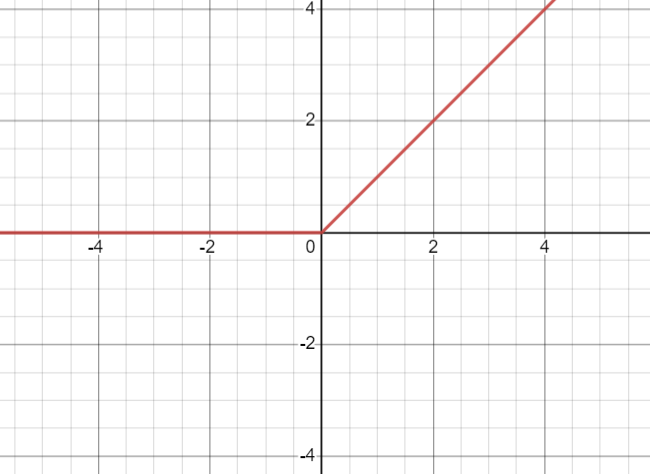

In [ ]:
model = Sequential()                                 # Model sekwencyjny - liniowe stosowanie warstw

# Warstwa konwolucyjna 1
model.add(Conv2D(32, (3, 3), input_shape=(70, 60, 1)))  # 32 różne jądra 3x3 -- czyli 32 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu

# Warstwa konwolucyjna 2
model.add(Conv2D(32, (3, 3)))                        # 32 różne jądra 3x3 -- czyli 32 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu
model.add(MaxPooling2D(pool_size=(2, 2)))            # pooling - wybór maksymalnych wartości z okna 2x2

# Warstwa konwolucyjna 3
model.add(Conv2D(64, (3, 3)))                        # 64 różne jądra 3x3 -- czyli 64 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu

# Warstwa konwolucyjna 4
model.add(Conv2D(64, (3, 3)))                        # 64 różne jądra 3x3 -- czyli 64 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu
model.add(MaxPooling2D(pool_size=(2, 2)))            # pooling - wybór maksymalnych wartości z okna 2x2

# Spłaszczenie obrazu
model.add(Flatten())                                 # Spłaszczanie końcowej macierzy wyjściowej 4x4x64 do wektora o długości 1024

# Warstwa w pełni połączona 5
model.add(Dense(512))                                # 512 węzłów w warstwie w pełni połączonej
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu

# Warstwa w pełni połączona 6
model.add(Dense(4))                                  # 4 węzły w warstwie w pełni połączonej (ostateczne wyjście)
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu

# Podsumowanie zbudowanej sieci
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 58, 32)        320       
                                                                 
 activation (Activation)     (None, 68, 58, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 66, 56, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 66, 56, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 28, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 26, 64)        18496     
                                                        

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

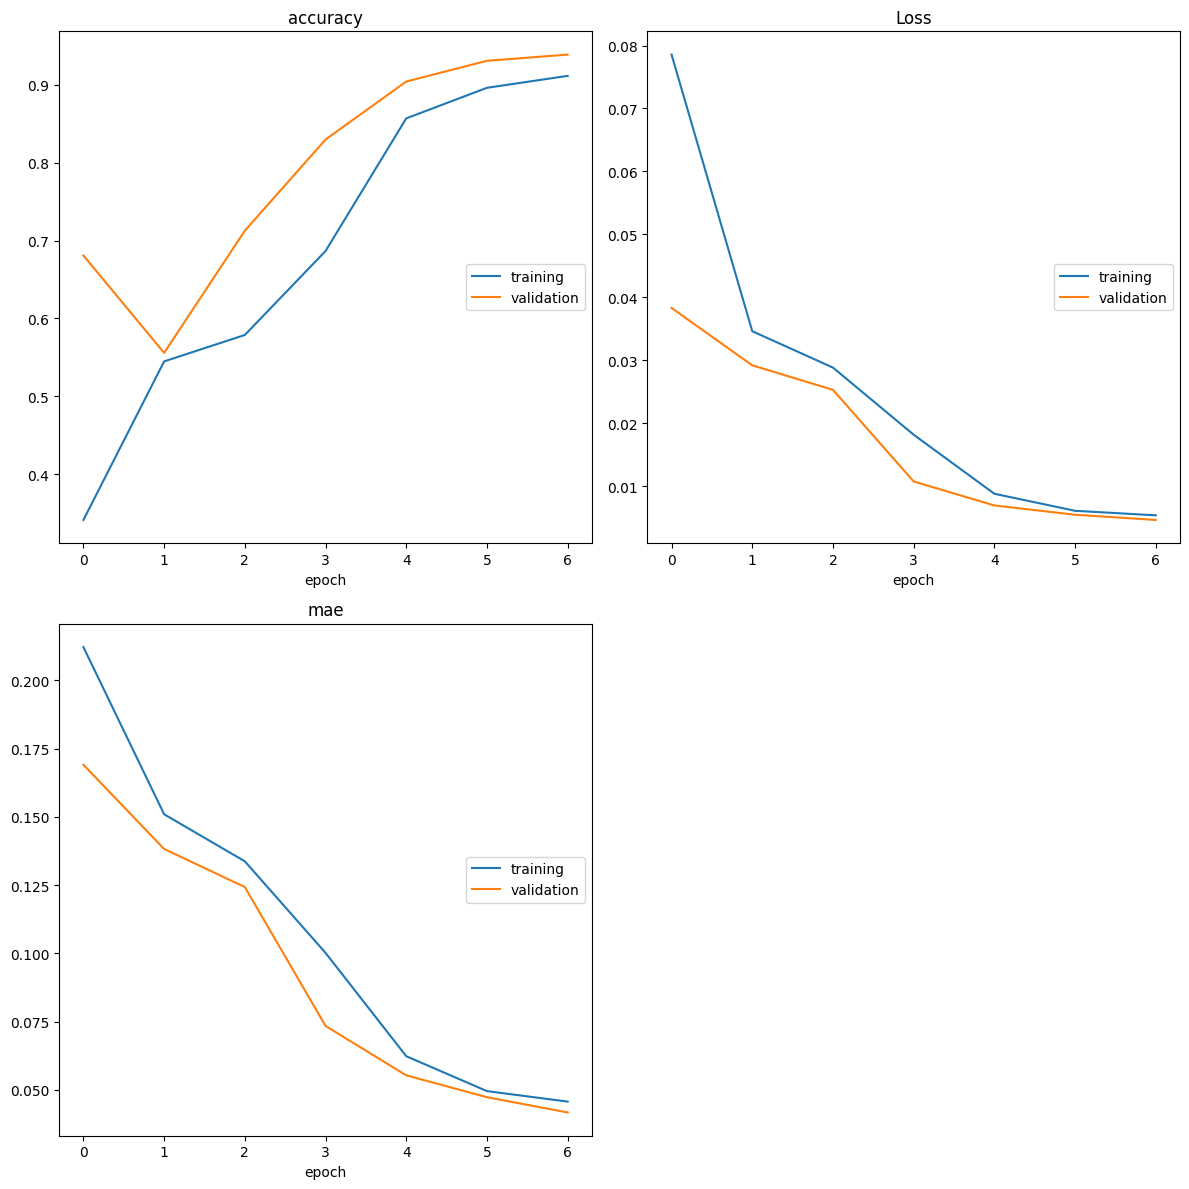

accuracy
	training         	 (min:    0.341, max:    0.912, cur:    0.912)
	validation       	 (min:    0.556, max:    0.939, cur:    0.939)
Loss
	training         	 (min:    0.005, max:    0.079, cur:    0.005)
	validation       	 (min:    0.005, max:    0.038, cur:    0.005)
mae
	training         	 (min:    0.046, max:    0.212, cur:    0.046)
	validation       	 (min:    0.042, max:    0.169, cur:    0.042)
12/12 [==============================] - 35s 3s/step - loss: 0.0053 - mae: 0.0457 - accuracy: 0.9115 - val_loss: 0.0046 - val_mae: 0.0417 - val_accuracy: 0.9388


In [ ]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=7,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=1)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted[0]

array([0.47495356, 0.26081845, 0.18490769, 0.09736161], dtype=float32)

In [ ]:
X_train_filenames[0]


's4_002_A_R'

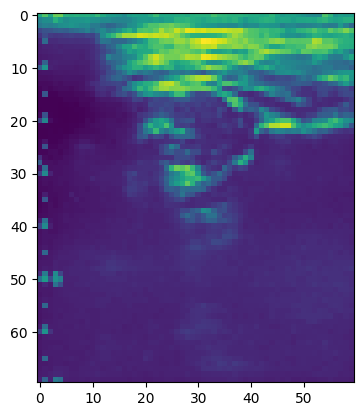

In [ ]:
plt.imshow(X_test[0,::])

In [ ]:
y_test[:,3]

array([0.1039604 , 0.14238683, 0.12769486, 0.09833333, 0.14776358,
       0.10982659, 0.12417219, 0.13036304, 0.12231405, 0.09212598,
       0.11211871, 0.11414392, 0.08835673, 0.11560694, 0.11239669,
       0.0776218 , 0.11973392, 0.0996732 , 0.11570248, 0.14614122,
       0.1187905 , 0.13591433, 0.09191759, 0.1063479 , 0.1218107 ,
       0.10790774, 0.14203138, 0.11582382, 0.13179572, 0.12799339,
       0.13410596, 0.10439105, 0.10578512, 0.13234078, 0.10373444,
       0.09390445, 0.13790256, 0.12417763, 0.09794239, 0.08173077,
       0.10833333, 0.13780664, 0.13636364, 0.18166804, 0.11229508,
       0.13587407, 0.11622074, 0.12561983, 0.13360656, 0.11808423,
       0.10817506, 0.13218391, 0.09570957, 0.12396694, 0.12561983,
       0.14600147, 0.1079967 , 0.13377374, 0.13234078, 0.13360996,
       0.13235294, 0.13813069, 0.11430921, 0.10190555, 0.11759868,
       0.10561056, 0.08985507, 0.16405606, 0.12982744, 0.10587262,
       0.12161052, 0.12996689, 0.09613804, 0.13813069, 0.11386

In [ ]:
y_train[0]

array([0.30033003, 0.27603306, 0.19691969, 0.10578512])

In [ ]:
img_list = X_train.tolist()
print(img_list)
print(len(img_list))
print(type(img_list))
img_nowe=X_train
img_nowe[0]
np.append(img_nowe,y_train)
plt.imshow(img_nowe[0,::])
type(labels['file_name'][0])
labels.iloc[0]

In [ ]:
img_nowe=X_train
img_nowe[0]

array([[[0.54901963],
        [0.5647059 ],
        [0.5882353 ],
        ...,
        [0.7411765 ],
        [0.7254902 ],
        [0.6627451 ]],

       [[0.40392157],
        [0.47058824],
        [0.46666667],
        ...,
        [0.4862745 ],
        [0.4627451 ],
        [0.42352942]],

       [[0.27450982],
        [0.29803923],
        [0.36862746],
        ...,
        [0.6745098 ],
        [0.64705884],
        [0.58431375]],

       ...,

       [[0.1882353 ],
        [0.1882353 ],
        [0.19215687],
        ...,
        [0.20392157],
        [0.21176471],
        [0.1882353 ]],

       [[0.18431373],
        [0.18431373],
        [0.18431373],
        ...,
        [0.20784314],
        [0.20784314],
        [0.18431373]],

       [[0.1764706 ],
        [0.1764706 ],
        [0.17254902],
        ...,
        [0.47058824],
        [0.3137255 ],
        [0.18039216]]], dtype=float32)

In [ ]:
np.append(img_nowe,y_train)

array([0.54901963, 0.56470591, 0.58823532, ..., 0.32399011, 0.21026654,
       0.12036274])

In [ ]:
img_nowe[0]


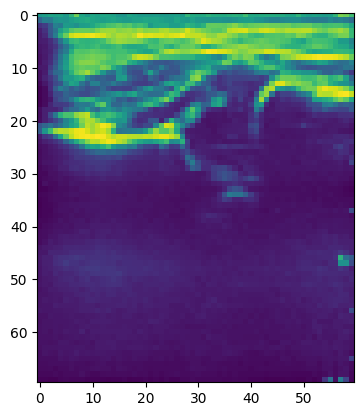

In [ ]:
plt.imshow(img_nowe[0,::])

In [ ]:
type(labels['file_name'][0])
labels.iloc[0]

przeskaluj_x            0.016473
przeskaluj_y            0.436214
przeskaluj_szerokosc    0.195736
przeskaluj_wysokosc     0.148148
file_name                 MK_01a
Name: 0, dtype: object

In [ ]:
mae_score = []
for i in range(len(predicted)):
  mae_score.append(np.mean(abs(np.array(y_test)[i] - predicted[i])))

In [ ]:
df.head(1)

,nazwa_pliku,img_height,img_width,roi_1_linia_podstawowa_wsp_x,roi_1_linia_podstawowa_wsp_y,roi_1_linia_podstawowa_sze,roi_1_linia_podstawowa_wys,przeskaluj_x,przeskaluj_y,przeskaluj_szerokosc,przeskaluj_wysokosc
0,MK_01a,1215,1032,17,530,202,180,0.016473,0.436214,0.195736,0.148148


In [ ]:
X_test_filenames


In [ ]:
df['przeskaluj_x']=df['roi_1_linia_podstawowa_wsp_x']/df['img_width']
df['przeskaluj_y']=df['roi_1_linia_podstawowa_wsp_y']/df['img_height']
df['przeskaluj_szerokosc']=df['roi_1_linia_podstawowa_sze']/df['img_width']
df['przeskaluj_wysokosc']=df['roi_1_linia_podstawowa_wys']/df['img_height']
df

,nazwa_pliku,img_height,img_width,roi_1_linia_podstawowa_wsp_x,roi_1_linia_podstawowa_wsp_y,roi_1_linia_podstawowa_sze,roi_1_linia_podstawowa_wys,przeskaluj_x,przeskaluj_y,przeskaluj_szerokosc,przeskaluj_wysokosc
0,MK_01a,1215,1032,17,530,202,180,0.016473,0.436214,0.195736,0.148148
1,MK_01b,1232,1032,150,668,259,259,0.145349,0.542208,0.250969,0.210227
2,MK_02a,1217,1020,17,382,187,195,0.016667,0.313887,0.183333,0.160230
3,MK_02b,1218,1023,76,502,251,168,0.074291,0.412151,0.245357,0.137931
4,MK_03a,1211,1024,603,351,208,138,0.588867,0.289843,0.203125,0.113955
...,...,...,...,...,...,...,...,...,...,...,...
1874,s8_149_P,1234,692,517,306,116,74,0.747110,0.247974,0.167630,0.059968
1875,s8_150_L,1430,1062,693,383,206,137,0.652542,0.267832,0.193974,0.095804
1876,s8_150_P,1430,1062,578,438,243,126,0.544256,0.306294,0.228814,0.088112
1877,s8_151_L,1322,990,633,338,167,95,0.639394,0.255673,0.168687,0.071861


In [ ]:
df2 = pd.DataFrame({'nazwa_pliku': X_test_filenames,
                   'test_x': predicted[:, 0],
                   'test_y': predicted[:, 1],
                   'test_szerokosc': predicted[:, 2],
                   'test_wysokosc': predicted[:, 3]})

# Display the DataFrame
print(df2)
filtered_df = pd.merge(df,df2,on='nazwa_pliku',how='inner')
filtered_df['test_przeskaluj_x']=filtered_df['img_width']*filtered_df['test_x']
filtered_df['test_przeskaluj_y']=filtered_df['img_height']*filtered_df['test_y']
filtered_df['test_przeskaluj_szerokosc']=filtered_df['img_width']*filtered_df['test_szerokosc']
filtered_df['test_przeskaluj_wysokosc']=filtered_df['img_height']*filtered_df['test_wysokosc']
filtered_df

    nazwa_pliku    test_x    test_y  test_szerokosc  test_wysokosc
0    s2_041_A_L  0.474954  0.260818        0.184908       0.097362
1    s2_044_D_L  0.592238  0.404502        0.248758       0.145306
2    s4_167_C_R  0.070130  0.399835        0.228373       0.123584
3    s4_140_F_R  0.204471  0.282916        0.198669       0.104818
4    s4_040_C_R  0.127946  0.350014        0.211916       0.111581
..          ...       ...       ...             ...            ...
371   s3_02_B_R  0.682053  0.376552        0.231715       0.128454
372  s6_195_B_P  0.379390  0.253731        0.211931       0.101685
373    s8_068_L  0.634121  0.308586        0.213444       0.129604
374  s4_037_A_L  0.153541  0.253126        0.201026       0.098639
375    s8_140_L  0.663859  0.252066        0.199364       0.108555

[376 rows x 5 columns]


,nazwa_pliku,img_height,img_width,roi_1_linia_podstawowa_wsp_x,roi_1_linia_podstawowa_wsp_y,roi_1_linia_podstawowa_sze,roi_1_linia_podstawowa_wys,przeskaluj_x,przeskaluj_y,przeskaluj_szerokosc,przeskaluj_wysokosc,test_x,test_y,test_szerokosc,test_wysokosc,test_przeskaluj_x,test_przeskaluj_y,test_przeskaluj_szerokosc,test_przeskaluj_wysokosc
0,MK_05b,1215,1025,663,445,189,163,0.646829,0.366255,0.184390,0.134156,0.590646,0.356963,0.231229,0.131125,605.412363,433.709911,237.009962,159.317241
1,MK_13b,1215,1018,530,491,221,180,0.520629,0.404115,0.217092,0.148148,0.567564,0.464577,0.255433,0.149480,577.779920,564.460897,260.031030,181.617874
2,MK_16a,1208,1025,795,396,203,155,0.775610,0.327815,0.198049,0.128311,0.593451,0.323532,0.207354,0.125027,608.287726,390.826170,212.538104,151.033211
3,MK_17a,1205,1021,715,381,224,128,0.700294,0.316183,0.219393,0.106224,0.519204,0.320241,0.215582,0.123179,530.106818,385.890877,220.109388,148.430197
4,MK_26a,1210,1026,148,457,206,160,0.144250,0.377686,0.200780,0.132231,0.111341,0.399558,0.252494,0.130266,114.236301,483.464721,259.059157,157.622306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,s8_138_L,1224,1004,524,394,157,125,0.521912,0.321895,0.156375,0.102124,0.651287,0.355454,0.220534,0.128185,653.892287,435.075766,221.415639,156.898591
372,s8_140_L,1250,992,635,260,200,130,0.640121,0.208000,0.201613,0.104000,0.663859,0.252066,0.199364,0.108555,658.548611,315.082148,197.769449,135.693979
373,s8_141_P,1248,874,512,287,190,102,0.585812,0.229968,0.217391,0.081731,0.466875,0.227393,0.174421,0.086726,408.049077,283.786112,152.443522,108.233958
374,s8_146_A_P,1227,1056,616,368,182,133,0.583333,0.299919,0.172348,0.108394,0.871424,0.279982,0.184839,0.107282,920.224016,343.537878,195.190184,131.635624


In [ ]:
y_train

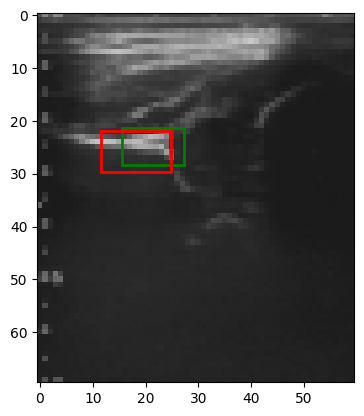

nazwa_pliku                     s2_045_C_L
img_height                            1207
img_width                              974
roi_1_linia_podstawowa_wsp_x           251
roi_1_linia_podstawowa_wsp_y           369
roi_1_linia_podstawowa_sze             191
roi_1_linia_podstawowa_wys             121
przeskaluj_x                        0.2577
przeskaluj_y                      0.305717
przeskaluj_szerokosc              0.196099
przeskaluj_wysokosc               0.100249
test_x                            0.192178
test_y                            0.314162
test_szerokosc                    0.221298
test_wysokosc                      0.11077
test_przeskaluj_x               187.181687
test_przeskaluj_y               379.193301
test_przeskaluj_szerokosc       215.544377
test_przeskaluj_wysokosc        133.698979
Name: 117, dtype: object


In [ ]:

first_column = filtered_df.iloc[:, 0]

# Select a random value from the first column
random_value = first_column.sample(n=1).values[0]
random_index = first_column[first_column == random_value].index[0]

szerokosc_oryg = int(filtered_df.iloc[random_index,2])
wysokosc_oryg = int(filtered_df.iloc[random_index,1])
szerokosc_nowe = 60
wysokosc_nowe = 70

ramka_x_oryg = int(filtered_df.iloc[random_index,3])
ramka_y_oryg = int(filtered_df.iloc[random_index,4])
ramka_szerokosc_oryg = int(filtered_df.iloc[random_index,5])
ramka_wysokosc_oryg = int(filtered_df.iloc[random_index,6])

szerokosc_ramki_nowe = (ramka_szerokosc_oryg / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe = (ramka_wysokosc_oryg / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe = (ramka_x_oryg / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe = (ramka_y_oryg / wysokosc_oryg) * wysokosc_nowe

ramka_x_oryg_pred = int(filtered_df.iloc[random_index,15])
ramka_y_oryg_pred = int(filtered_df.iloc[random_index,16])
ramka_szerokosc_oryg_pred = int(filtered_df.iloc[random_index,17])
ramka_wysokosc_oryg_pred = int(filtered_df.iloc[random_index,18])

szerokosc_ramki_nowe_pred = (ramka_szerokosc_oryg_pred / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe_pred = (ramka_wysokosc_oryg_pred / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe_pred = (ramka_x_oryg_pred / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe_pred = (ramka_y_oryg_pred / wysokosc_oryg) * wysokosc_nowe

plt.figure()
img = plt.imread(random_value+'.png')
plt.imshow(img)

# Dodanie przeskalowanej ramki
#wartości rzeczywiste
rect = patches.Rectangle((ramka_x_nowe, ramka_y_nowe), szerokosc_ramki_nowe, wysokosc_ramki_nowe, linewidth=2, edgecolor='green', facecolor='none')
plt.gca().add_patch(rect)
#wartości przewidziane
rect1 = patches.Rectangle((ramka_x_nowe_pred, ramka_y_nowe_pred), szerokosc_ramki_nowe_pred, wysokosc_ramki_nowe_pred, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect1)

# Dodanie przeskalowanego punktu
plt.show()
print(filtered_df.iloc[random_index])

Poprawa jakości modelu

In [ ]:
model = Sequential()                                 # Model sekwencyjny - liniowe stosowanie warstw

# Warstwa konwolucyjna 1
model.add(Conv2D(32, (3, 3), input_shape=(70, 60, 1)))  # 32 różne jądra 3x3 -- czyli 32 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu
# Warstwa konwolucyjna 2
model.add(Conv2D(32, (3, 3)))                        # 32 różne jądra 3x3 -- czyli 32 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu
model.add(MaxPooling2D(pool_size=(2, 2)))            # pooling - wybór maksymalnych wartości z okna 2x2
# Warstwa konwolucyjna 3
model.add(Conv2D(64, (3, 3)))                        # 64 różne jądra 3x3 -- czyli 64 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu
# Warstwa konwolucyjna 4
model.add(Conv2D(128, (3, 3)))                        # 64 różne jądra 3x3 -- czyli 64 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu

# Warstwa konwolucyjna 5
model.add(Conv2D(256, (3, 3)))                        # 64 różne jądra 3x3 -- czyli 64 mapy cech
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu
model.add(MaxPooling2D(pool_size=(2, 2)))            # pooling - wybór maksymalnych wartości z okna 2x2
# Spłaszczenie obrazu
model.add(Flatten())                                 # Spłaszczanie końcowej macierzy wyjściowej 4x4x64 do wektora o długości 1024

# Warstwa w pełni połączona 6
model.add(Dense(512))                                # 512 węzłów w warstwie w pełni połączonej
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu
# Warstwa w pełni połączona 7
model.add(Dense(4))                                  # 4 węzły w warstwie w pełni połączonej (ostateczne wyjście)
model.add(Activation('relu'))                        # aktywacja za pomocą funkcji relu

# Podsumowanie zbudowanej sieci
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 68, 58, 32)        320       
                                                                 
 activation_19 (Activation)  (None, 68, 58, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 66, 56, 32)        9248      
                                                                 
 activation_20 (Activation)  (None, 66, 56, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 33, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 31, 26, 64)        18496     
                                                      

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

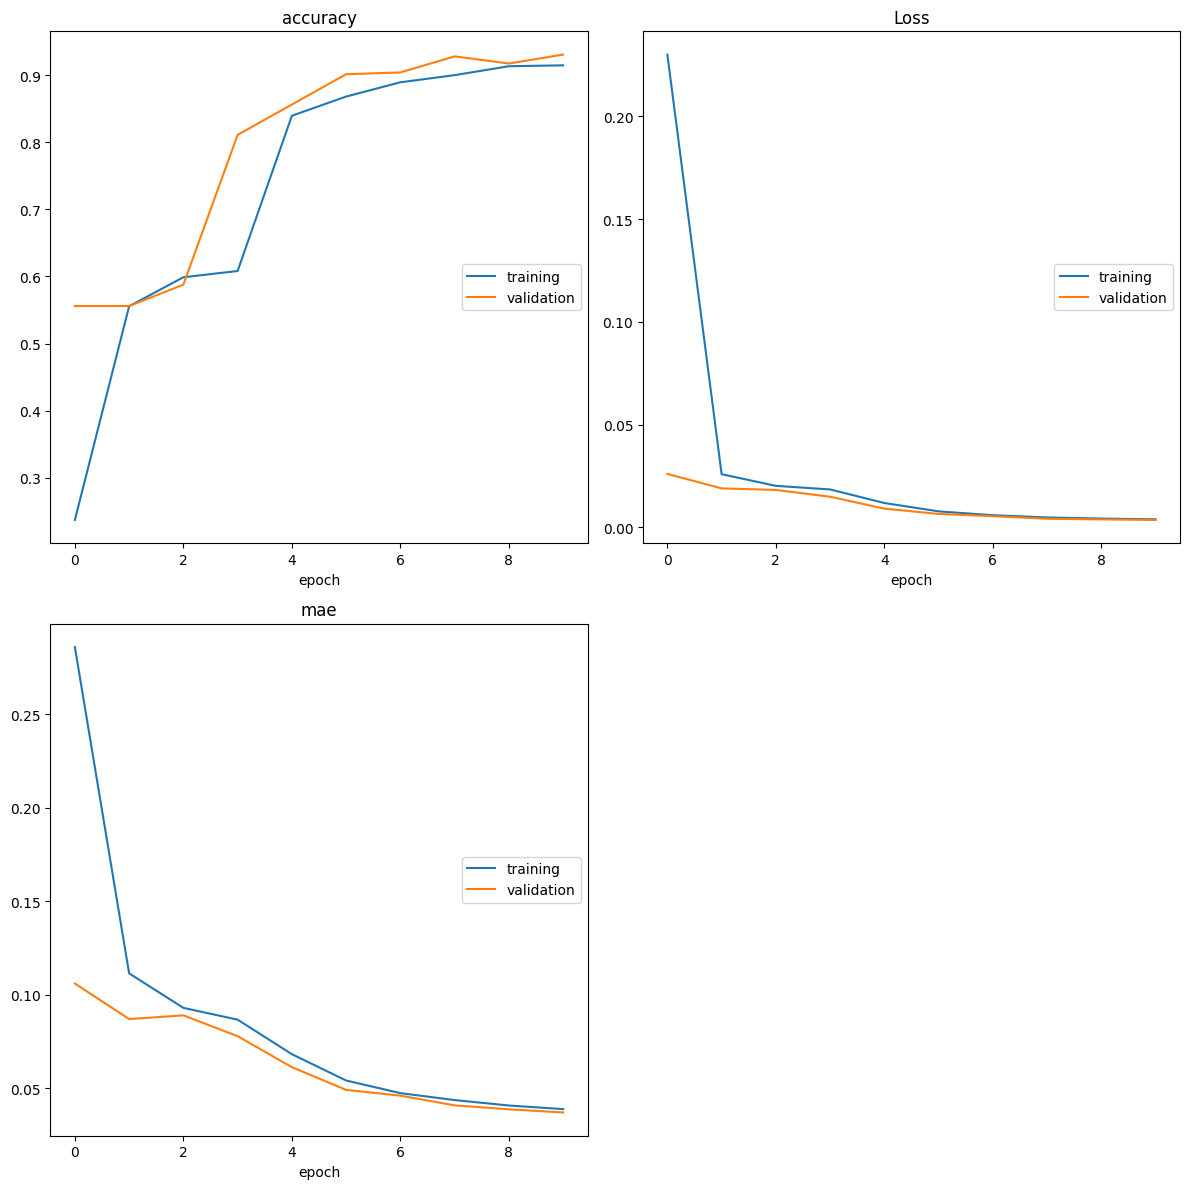

accuracy
	training         	 (min:    0.237, max:    0.915, cur:    0.915)
	validation       	 (min:    0.556, max:    0.931, cur:    0.931)
Loss
	training         	 (min:    0.004, max:    0.230, cur:    0.004)
	validation       	 (min:    0.004, max:    0.026, cur:    0.004)
mae
	training         	 (min:    0.039, max:    0.286, cur:    0.039)
	validation       	 (min:    0.037, max:    0.106, cur:    0.037)
12/12 [==============================] - 94s 8s/step - loss: 0.0039 - mae: 0.0388 - accuracy: 0.9148 - val_loss: 0.0036 - val_mae: 0.0370 - val_accuracy: 0.9309


In [ ]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=1)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
img_list = X_train.tolist()
print(img_list)
print(len(img_list))
print(type(img_list))
img_nowe=X_train
img_nowe[0]
np.append(img_nowe,y_train)
plt.imshow(img_nowe[0,::])
type(labels['file_name'][0])
labels.iloc[0]

In [ ]:
mae_score = []
for i in range(len(predicted)):
  mae_score.append(np.mean(abs(np.array(y_test)[i] - predicted[i])))

In [ ]:
df2 = pd.DataFrame({'nazwa_pliku': X_test_filenames,
                   'test_x': predicted[:, 0],
                   'test_y': predicted[:, 1],
                   'test_szerokosc': predicted[:, 2],
                   'test_wysokosc': predicted[:, 3]})

# Display the DataFrame
print(df2)
filtered_df = pd.merge(df,df2,on='nazwa_pliku',how='inner')
filtered_df['test_przeskaluj_x']=filtered_df['img_width']*filtered_df['test_x']
filtered_df['test_przeskaluj_y']=filtered_df['img_height']*filtered_df['test_y']
filtered_df['test_przeskaluj_szerokosc']=filtered_df['img_width']*filtered_df['test_szerokosc']
filtered_df['test_przeskaluj_wysokosc']=filtered_df['img_height']*filtered_df['test_wysokosc']
filtered_df

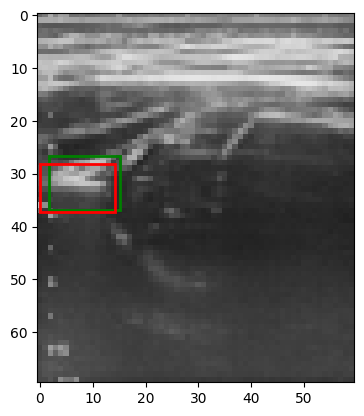

nazwa_pliku                     s2_048_D_L
img_height                            1218
img_width                             1010
roi_1_linia_podstawowa_wsp_x            29
roi_1_linia_podstawowa_wsp_y           463
roi_1_linia_podstawowa_sze             226
roi_1_linia_podstawowa_wys             178
przeskaluj_x                      0.028713
przeskaluj_y                      0.380131
przeskaluj_szerokosc              0.223762
przeskaluj_wysokosc               0.146141
test_x                                 0.0
test_y                             0.40298
test_szerokosc                    0.238578
test_wysokosc                     0.131219
test_przeskaluj_x                      0.0
test_przeskaluj_y               490.829821
test_przeskaluj_szerokosc       240.963922
test_przeskaluj_wysokosc        159.824941
Name: 126, dtype: object


In [ ]:
first_column = filtered_df.iloc[:, 0]

# Select a random value from the first column
random_value = first_column.sample(n=1).values[0]
random_index = first_column[first_column == random_value].index[0]

szerokosc_oryg = int(filtered_df.iloc[random_index,2])
wysokosc_oryg = int(filtered_df.iloc[random_index,1])
szerokosc_nowe = 60
wysokosc_nowe = 70

ramka_x_oryg = int(filtered_df.iloc[random_index,3])
ramka_y_oryg = int(filtered_df.iloc[random_index,4])
ramka_szerokosc_oryg = int(filtered_df.iloc[random_index,5])
ramka_wysokosc_oryg = int(filtered_df.iloc[random_index,6])

szerokosc_ramki_nowe = (ramka_szerokosc_oryg / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe = (ramka_wysokosc_oryg / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe = (ramka_x_oryg / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe = (ramka_y_oryg / wysokosc_oryg) * wysokosc_nowe

ramka_x_oryg_pred = int(filtered_df.iloc[random_index,15])
ramka_y_oryg_pred = int(filtered_df.iloc[random_index,16])
ramka_szerokosc_oryg_pred = int(filtered_df.iloc[random_index,17])
ramka_wysokosc_oryg_pred = int(filtered_df.iloc[random_index,18])

szerokosc_ramki_nowe_pred = (ramka_szerokosc_oryg_pred / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe_pred = (ramka_wysokosc_oryg_pred / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe_pred = (ramka_x_oryg_pred / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe_pred = (ramka_y_oryg_pred / wysokosc_oryg) * wysokosc_nowe

plt.figure()
img = plt.imread(random_value+'.png')
plt.imshow(img)

# Dodanie przeskalowanej ramki
#wartości rzeczywiste
rect = patches.Rectangle((ramka_x_nowe, ramka_y_nowe), szerokosc_ramki_nowe, wysokosc_ramki_nowe, linewidth=2, edgecolor='green', facecolor='none')
plt.gca().add_patch(rect)
#wartości przewidziane
rect1 = patches.Rectangle((ramka_x_nowe_pred, ramka_y_nowe_pred), szerokosc_ramki_nowe_pred, wysokosc_ramki_nowe_pred, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect1)

# Dodanie przeskalowanego punktu
plt.show()
print(filtered_df.iloc[random_index])

In [ ]:
model = Sequential()                                 # Model sekwencyjny - liniowe stosowanie warstw

model.add(Conv2D(32, (3, 3), input_shape=(70, 60, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Conv Layer 2
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Layer 3
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Conv Layer 4
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2 (Output Layer)
model.add(Dense(4))  # Predicting bounding box coordinates
model.add(Activation('linear'))

# Podsumowanie zbudowanej sieci
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 68, 58, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 68, 58, 32)       128       
 ormalization)                                                   
                                                                 
 activation_32 (Activation)  (None, 68, 58, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 66, 56, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 66, 56, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_33 (Activation)  (None, 66, 56, 64)       

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae','accuracy'])

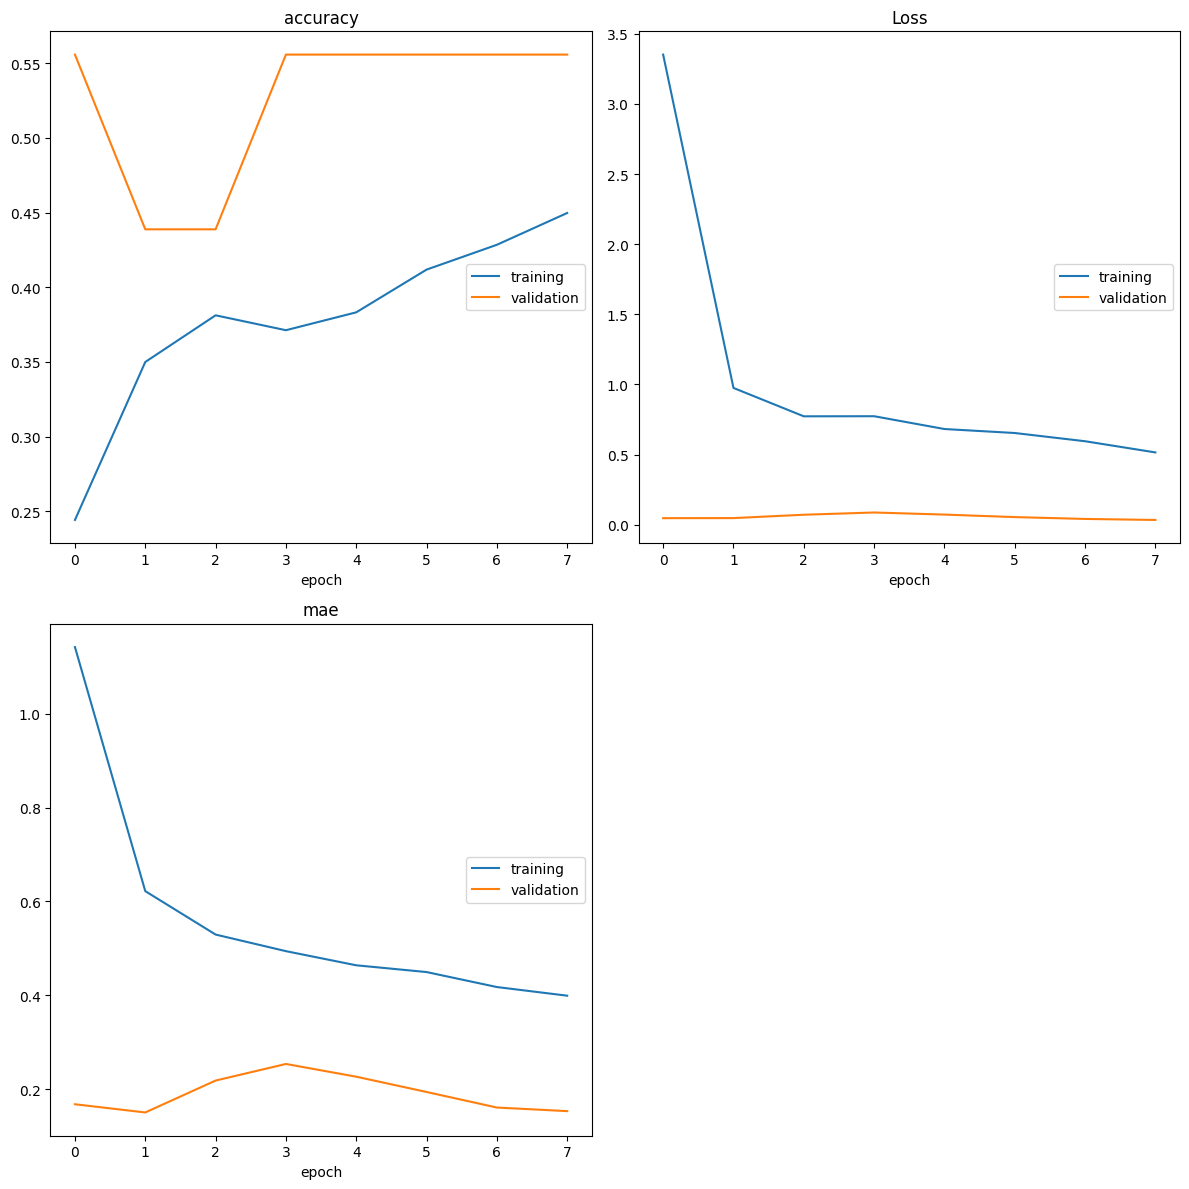

accuracy
	training         	 (min:    0.244, max:    0.450, cur:    0.450)
	validation       	 (min:    0.439, max:    0.556, cur:    0.556)
Loss
	training         	 (min:    0.515, max:    3.352, cur:    0.515)
	validation       	 (min:    0.034, max:    0.087, cur:    0.034)
mae
	training         	 (min:    0.399, max:    1.142, cur:    0.399)
	validation       	 (min:    0.150, max:    0.254, cur:    0.153)
12/12 [==============================] - 130s 11s/step - loss: 0.5154 - mae: 0.3991 - accuracy: 0.4498 - val_loss: 0.0340 - val_mae: 0.1529 - val_accuracy: 0.5559


In [ ]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=8,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=1)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
img_list = X_train.tolist()
print(img_list)
print(len(img_list))
print(type(img_list))
img_nowe=X_train
img_nowe[0]
np.append(img_nowe,y_train)
plt.imshow(img_nowe[0,::])
type(labels['file_name'][0])
labels.iloc[0]

In [ ]:
mae_score = []
for i in range(len(predicted)):
  mae_score.append(np.mean(abs(np.array(y_test)[i] - predicted[i])))

In [ ]:
df2 = pd.DataFrame({'nazwa_pliku': X_test_filenames,
                   'test_x': predicted[:, 0],
                   'test_y': predicted[:, 1],
                   'test_szerokosc': predicted[:, 2],
                   'test_wysokosc': predicted[:, 3]})

# Display the DataFrame
print(df2)
filtered_df = pd.merge(df,df2,on='nazwa_pliku',how='inner')
filtered_df['test_przeskaluj_x']=filtered_df['img_width']*filtered_df['test_x']
filtered_df['test_przeskaluj_y']=filtered_df['img_height']*filtered_df['test_y']
filtered_df['test_przeskaluj_szerokosc']=filtered_df['img_width']*filtered_df['test_szerokosc']
filtered_df['test_przeskaluj_wysokosc']=filtered_df['img_height']*filtered_df['test_wysokosc']
filtered_df

In [ ]:
first_column = filtered_df.iloc[:, 0]

# Select a random value from the first column
random_value = first_column.sample(n=1).values[0]
random_index = first_column[first_column == random_value].index[0]

szerokosc_oryg = int(filtered_df.iloc[random_index,2])
wysokosc_oryg = int(filtered_df.iloc[random_index,1])
szerokosc_nowe = 60
wysokosc_nowe = 70

ramka_x_oryg = int(filtered_df.iloc[random_index,3])
ramka_y_oryg = int(filtered_df.iloc[random_index,4])
ramka_szerokosc_oryg = int(filtered_df.iloc[random_index,5])
ramka_wysokosc_oryg = int(filtered_df.iloc[random_index,6])

szerokosc_ramki_nowe = (ramka_szerokosc_oryg / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe = (ramka_wysokosc_oryg / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe = (ramka_x_oryg / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe = (ramka_y_oryg / wysokosc_oryg) * wysokosc_nowe

ramka_x_oryg_pred = int(filtered_df.iloc[random_index,15])
ramka_y_oryg_pred = int(filtered_df.iloc[random_index,16])
ramka_szerokosc_oryg_pred = int(filtered_df.iloc[random_index,17])
ramka_wysokosc_oryg_pred = int(filtered_df.iloc[random_index,18])

szerokosc_ramki_nowe_pred = (ramka_szerokosc_oryg_pred / szerokosc_oryg) * szerokosc_nowe
wysokosc_ramki_nowe_pred = (ramka_wysokosc_oryg_pred / wysokosc_oryg) * wysokosc_nowe
ramka_x_nowe_pred = (ramka_x_oryg_pred / szerokosc_oryg) * szerokosc_nowe
ramka_y_nowe_pred = (ramka_y_oryg_pred / wysokosc_oryg) * wysokosc_nowe

plt.figure()
img = plt.imread(random_value+'.png')
plt.imshow(img)

# Dodanie przeskalowanej ramki
#wartości rzeczywiste
rect = patches.Rectangle((ramka_x_nowe, ramka_y_nowe), szerokosc_ramki_nowe, wysokosc_ramki_nowe, linewidth=2, edgecolor='green', facecolor='none')
plt.gca().add_patch(rect)
#wartości przewidziane
rect1 = patches.Rectangle((ramka_x_nowe_pred, ramka_y_nowe_pred), szerokosc_ramki_nowe_pred, wysokosc_ramki_nowe_pred, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect1)

# Dodanie przeskalowanego punktu
plt.show()
print(filtered_df.iloc[random_index])